In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import train_test_split

## Data Read In and Preprocessing 

In [171]:
adult_temp = pd.read_csv("/Users/craiglab/Documents/ml/adult.data",
                        header= None, na_values= ['nan'])


In [172]:
adult = adult_temp.rename(columns={0: 'age', 
                                    1: 'workclass',
                                    2: 'fnlwgt',
                                    3: 'education',
                                    4: 'education-num',
                                    5: 'marital-status',
                                    6: 'occupation',
                                    7: 'relationship',
                                    8: 'race',
                                    9: 'sex',
                                    10: 'capital-gain',
                                    11: 'capital-loss',
                                  12: 'hours-per-week',
                                  13:'native-country',
                                  14:'above_50'})
      

In [173]:
# normalize dataset numeric attributes
for x in ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']:
    adult[x] = (adult[x] - adult[x].mean()) / adult[x].std()


In [174]:
adult.drop(['education'], axis = 1, inplace = True)

In [175]:
adult.columns

Index([u'age', u'workclass', u'fnlwgt', u'education-num', u'marital-status',
       u'occupation', u'relationship', u'race', u'sex', u'capital-gain',
       u'capital-loss', u'hours-per-week', u'native-country', u'above_50'],
      dtype='object')

In [176]:
adult.shape

(32561, 14)

In [177]:
adult = pd.get_dummies(adult)

In [178]:
print adult.shape

(32561, 94)


In [179]:
print adult.columns

Index([u'age', u'fnlwgt', u'education-num', u'capital-gain', u'capital-loss',
       u'hours-per-week', u'workclass_ ?', u'workclass_ Federal-gov',
       u'workclass_ Local-gov', u'workclass_ Never-worked',
       u'workclass_ Private', u'workclass_ Self-emp-inc',
       u'workclass_ Self-emp-not-inc', u'workclass_ State-gov',
       u'workclass_ Without-pay', u'marital-status_ Divorced',
       u'marital-status_ Married-AF-spouse',
       u'marital-status_ Married-civ-spouse',
       u'marital-status_ Married-spouse-absent',
       u'marital-status_ Never-married', u'marital-status_ Separated',
       u'marital-status_ Widowed', u'occupation_ ?',
       u'occupation_ Adm-clerical', u'occupation_ Armed-Forces',
       u'occupation_ Craft-repair', u'occupation_ Exec-managerial',
       u'occupation_ Farming-fishing', u'occupation_ Handlers-cleaners',
       u'occupation_ Machine-op-inspct', u'occupation_ Other-service',
       u'occupation_ Priv-house-serv', u'occupation_ Prof-specialt

In [180]:
#x = adult

#df.drop(df.columns[[1, 69]], axis=1, inplace=True)
#df.drop('reports', axis=1)
#
#x.columns
adult.drop(['workclass_ ?', 
       'marital-status_ Divorced',
       'occupation_ ?',
       'relationship_ Husband',
       'race_ Amer-Indian-Eskimo',
       'sex_ Female',
       'native-country_ ?',
       'above_50_ <=50K'], axis =1, inplace = True)



In [181]:
#split adult data
X_adult = adult.iloc[:, 0:-1]
Y_adult = adult.iloc[:, -1]
#print X_train_adult.shape
#print X_test_adult.shape
#print Y_train_adult.shape
#print Y_test_adult.shape
X_train_adult, X_test_adult, Y_train_adult, Y_test_adult = train_test_split(X_adult, Y_adult)

In [183]:
print X_adult.shape
print Y_adult.shape

(32561, 85)
(32561,)


## Neural Network

In [27]:
from pybrain.datasets import ClassificationDataSet
from pybrain.utilities import percentError
from pybrain.tools.shortcuts import buildNetwork
from pybrain.supervised.trainers import BackpropTrainer
from pybrain.structure.modules import SoftmaxLayer

In [213]:
# since data size is too big, only keep 10% of data
rows = X_adult.shape[0]
idx = np.random.choice(range(rows), size = int(rows/10), replace=False);
X_adult = np.array(X_adult)
Y_adult = np.array(Y_adult)

In [214]:
data = X_adult[idx]
target = np.array(Y_adult[idx])

In [215]:
print type(data)
print type(target)

<type 'numpy.ndarray'>
<type 'numpy.ndarray'>


In [216]:
print data.shape
print target.shape

(3256, 85)
(3256,)


In [217]:
ds_adult = ClassificationDataSet(85, 1, nb_classes = 2)
for i in range(len(data)):
    ds_adult.addSample(data[i], target[i])

In [218]:
# dimension of the input and target data which is 85, 1 and the number of classes as 2

trndata_adult, tstdata_adult = ds_adult.splitWithProportion(0.750)

# encode classes with one output neuron per class, since softmaxlayer activation function in output neuron which requires one neuron per output class
trndata_adult._convertToOneOfMany()
tstdata_adult._convertToOneOfMany()

In [219]:
fnn_adult = buildNetwork(85, 43, 2, outclass= SoftmaxLayer)
     
tr_adult = BackpropTrainer(fnn_adult, dataset = trndata_adult, momentum = 0.1, verbose = False, weightdecay = 0.01)
    

In [220]:
tr_adult.trainOnDataset(trndata_adult, epochs = 2)

#predict train dataset
train_predicted = fnn_adult.activateOnDataset(trndata_adult).argmax(axis = 1)

train_accur_score = percentError(train_predicted, trndata_adult['class'])

print "train accuracy: ", train_accur_score

# predict test dataset
tst_predicted = fnn_adult.activateOnDataset(tstdata_adult).argmax(axis = 1)

test_accur_score = percentError(tst_predicted, tstdata_adult['class'])

print "test accuracy: ", test_accur_score

train accuracy:  15.9705159705
test accuracy:  15.1105651106


## 1. Run the clustering algorithms on the data sets and describe what you see.

### K-means clustering

In [43]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [72]:
n_samples, n_features =data.shape
print "number of samples: {}, number of feature {}".format(n_samples, n_features)
n_types = len(np.unique(target))
print
print "number of class: {}".format(n_types)

number of samples: 3256, number of feature 85

number of class: 2


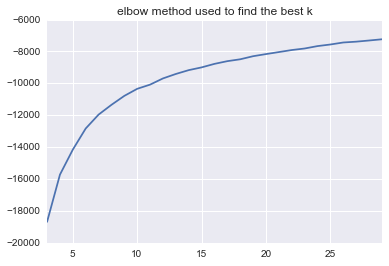

In [312]:
# use "elbow method" to find the best k
# kmeans score returns the opposite of the sum of inter-cluster distances, the sum of inter-cluster distances is what k-means tries to minimize
scores = []
for i in range(3, 30):
    kmeans_model = KMeans(n_clusters=i, random_state=1)
    kmeans_model.fit(data)
    score = kmeans_model.score(data)
    scores.append(score)
    
    
#graph scores
pd.Series(scores, index = pd.Series(range(3,30))).plot()
plt.title("elbow method used to find the best k")



In [313]:
kmeans_model = KMeans(n_clusters=2, random_state=1)
kmeans_model.fit(data)
labels = kmeans_model.labels_

expected = target
predicted = kmeans_model.predict(data)
print(metrics.classification_report(expected, predicted))


             precision    recall  f1-score   support

        0.0       0.76      0.96      0.85      2458
        1.0       0.26      0.05      0.08       798

avg / total       0.64      0.74      0.66      3256



In [314]:
from sklearn.metrics.cluster import adjusted_rand_score
round(adjusted_rand_score(predicted, expected), 4)

0.0039

In [315]:
print(metrics.confusion_matrix(expected, predicted))

[[2358  100]
 [ 762   36]]


In [316]:
print "the percentage of correctly classified labels: {}".format((2358 + 36) / (2411.0 + 68 +68 + 709))

the percentage of correctly classified labels: 0.735257985258


### Expectation Maximization

In [320]:
from sklearn import mixture

gmm = mixture.GMM(n_components=2, covariance_type='full')
gmm.fit(data)

GMM(covariance_type='full', init_params='wmc', min_covar=0.001,
  n_components=2, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=0)

In [321]:
predicted = gmm.predict(data)
print(metrics.confusion_matrix(expected, predicted));

[[1998  460]
 [ 644  154]]


In [322]:
round(adjusted_rand_score(predicted, expected), 4)

0.0029

In [323]:
lowest_bic = np.infty
bic = []
n_components_range = range(1, 30)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a mixture of Gaussians with EM
        gmm = mixture.GMM(n_components=n_components, covariance_type=cv_type)
        gmm.fit(data)
        bic.append(gmm.bic(data))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

In [324]:
best_gmm

GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=28, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=0)

In [325]:
gmm = mixture.GMM(n_components = 2, covariance_type='diag')
gmm.fit(data)
predicted = gmm.predict(data)
print(metrics.classification_report(expected, predicted));


             precision    recall  f1-score   support

        0.0       0.76      0.96      0.84      2458
        1.0       0.26      0.05      0.08       798

avg / total       0.64      0.73      0.66      3256



In [326]:
print round(adjusted_rand_score(expected, predicted), 4)

0.0039


In [327]:

print(metrics.confusion_matrix(expected, predicted));

[[2355  103]
 [ 761   37]]


In [328]:
print "the percentage of correctly classified labels: {}".format((2355 + 37) / (2411.0 + 68 +68 + 709))

the percentage of correctly classified labels: 0.734643734644


## 2. Apply the dimensionality reduction algorithms to the two datasets and describe what you see.


### PCA model

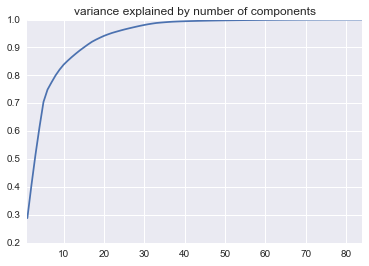

In [99]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 85)
pca.fit(data)
#print pca.explained_variance_ratio_
variance_explained = pca.explained_variance_ratio_
variance_explained = pd.Series(variance_explained)
components = pd.Series(range(1, 85))
ve =pd.Series(variance_explained.cumsum(), index=pd.Series(range(1, 85)))
ve.plot()
plt.title("variance explained by number of components")

In [100]:
pca = PCA(n_components = 30)
pca.fit(data)
fitted_data_pca = pca.fit_transform(data)
fitted_data_pca.shape

(3256, 30)

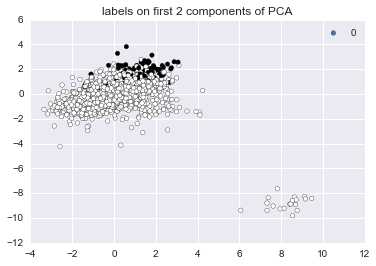

In [296]:
#If we chose first two componen, we can see both first two components seperate the clusters pretty well
#Create a PCA model.
pca_2 = PCA(2)
# Fit the PCA model on the numeric columns from earlier.
plot_columns = pca_2.fit_transform(data)
# Make a scatter plot of each game, shaded according to cluster assignment.
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=labels)
plt.legend(labels, loc = 'best')
plt.title("labels on first 2 components of PCA")
# Show the plot.
plt.show()

### ICA model

In [103]:
from sklearn.decomposition import FastICA
from scipy.stats import kurtosis

In [106]:
kurt_score = []
for i in range(5, 85, 5):
    
    ica = FastICA(n_components = i, whiten = True)
    fitted_data_ica = ica.fit_transform(data)
    kurt = kurtosis(fitted_data_ica)
    kurt_score.append(np.sum(kurt))
    #print 'i: {}, total_kurtosis: {}'.format(i, np.sum(kurt))

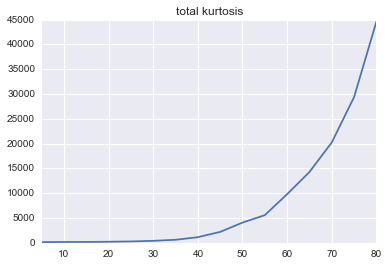

In [109]:
kurt_score = pd.Series(kurt_score, index=pd.Series(range(5, 85, 5)))
kurt_score.plot()
plt.title("total kurtosis")

In [110]:
ica = FastICA(whiten = True)
fitted_data_ica = ica.fit_transform(data)
fitted_data_ica.shape

(3256, 85)

### Random Projection¶

In [111]:
from sklearn import random_projection


In [112]:
eps_range = np.linspace(0.01, 0.99, 10)
for i in eps_range:
    try:
        rp = random_projection.GaussianRandomProjection(eps = i)
        fitted_data_rp =rp.fit_transform(data)
        print "eps: {}, the features after reduced dimension: {}".format(i, fitted_data_rp)
    except ValueError:
        print 'eps: {}, value error'.format(i)


eps: 0.01, value error
eps: 0.118888888889, value error
eps: 0.227777777778, value error
eps: 0.336666666667, value error
eps: 0.445555555556, value error
eps: 0.554444444444, value error
eps: 0.663333333333, value error
eps: 0.772222222222, value error
eps: 0.881111111111, value error
eps: 0.99, value error


In [113]:
for i in eps_range:
    try:
        rp = random_projection.SparseRandomProjection(eps = i)
        fitted_data_rp =rp.fit_transform(data)
        print "eps: {}, the features after reduced dimension: {}".format(i, fitted_data_rp)
    except ValueError:
        print 'eps: {}, value error'.format(i)


eps: 0.01, value error
eps: 0.118888888889, value error
eps: 0.227777777778, value error
eps: 0.336666666667, value error
eps: 0.445555555556, value error
eps: 0.554444444444, value error
eps: 0.663333333333, value error
eps: 0.772222222222, value error
eps: 0.881111111111, value error
eps: 0.99, value error


### Tree based model selection¶

In [114]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

clf = ExtraTreesClassifier()
clf = clf.fit(data, target)
clf.feature_importances_  

model = SelectFromModel(clf, prefit=True)
fitted_data_tb = model.transform(data)
fitted_data_tb.shape 

(3256, 15)

## 3. Reproduce your clustering experiments, but on the data after you've run dimensionality reduction on it.


### data -> PCA -> kmeans clustering

In [329]:
#kmeans_model = KMeans(n_clusters=12, random_state=1)
kmeans_model.fit(fitted_data_pca)
#labels = kmeans_model.labels_

expected = target
predicted_pca = kmeans_model.predict(fitted_data_pca)
print(metrics.classification_report(expected, predicted_pca))

print "adjusted rand score: {}".format(round(adjusted_rand_score(expected, predicted_pca), 4))

             precision    recall  f1-score   support

        0.0       0.76      0.96      0.85      2458
        1.0       0.26      0.05      0.08       798

avg / total       0.64      0.74      0.66      3256

adjusted rand score: 0.0039


In [330]:
print(metrics.confusion_matrix(expected, predicted_pca));

[[2358  100]
 [ 762   36]]


In [331]:
print "the percentage of correctly classified labels: {}".format((2358 + 36) / (2411.0 + 68 +68 + 709))

the percentage of correctly classified labels: 0.735257985258


### data -> ICA -> kmeans clustering

In [142]:
#kmeans_model = KMeans(n_clusters=12, random_state=1)
kmeans_model.fit(fitted_data_ica)
#labels = kmeans_model.labels_

expected = target
predicted_ica = kmeans_model.predict(fitted_data_ica)
print(metrics.classification_report(expected, predicted_ica))

print "adjusted rand score: {}".format(round(adjusted_rand_score(expected, predicted_ica), 4))

             precision    recall  f1-score   support

        0.0       0.70      0.60      0.65      2479
        1.0       0.13      0.20      0.16       777

avg / total       0.57      0.50      0.53      3256

adjusted rand score: -0.0239


In [332]:
print(metrics.confusion_matrix(expected, predicted_ica));

[[1586  872]
 [ 516  282]]


In [333]:
print "the percentage of correctly classified labels: {}".format((1586 + 287) / (2411.0 + 68 +68 + 709))

the percentage of correctly classified labels: 0.575245700246


### data -> tree based feature selection -> kmeans clustering

In [143]:
#kmeans_model = KMeans(n_clusters=12, random_state=1)
kmeans_model.fit(fitted_data_tb)
#labels = kmeans_model.labels_

expected = target
predicted_tb = kmeans_model.predict(fitted_data_tb)
print(metrics.classification_report(expected, predicted_tb))

print "adjusted rand score: {}".format(round(adjusted_rand_score(expected, predicted_tb), 4))

             precision    recall  f1-score   support

        0.0       0.77      0.97      0.86      2479
        1.0       0.50      0.09      0.15       777

avg / total       0.71      0.76      0.69      3256

adjusted rand score: 0.0567


In [334]:
print(metrics.confusion_matrix(expected, predicted_tb));

[[2358  100]
 [ 762   36]]


In [336]:
print "the percentage of correctly classified labels: {}".format((2385 + 36) / (2411.0 + 68 +68 + 709))

the percentage of correctly classified labels: 0.74355036855


### data -> PCA -> Expectation Maximization clustering

In [133]:
gmm.fit(fitted_data_pca)
predicted_gmm_pca = gmm.predict(fitted_data_pca)
print(metrics.classification_report(expected, predicted_gmm_pca))

print "adjusted rand score: {}".format(round(adjusted_rand_score(expected, predicted_gmm_pca), 4))


             precision    recall  f1-score   support

        0.0       0.77      1.00      0.87      2479
        1.0       1.00      0.02      0.05       777

avg / total       0.82      0.77      0.67      3256

adjusted rand score: 0.0255


In [337]:
print(metrics.confusion_matrix(expected, predicted_gmm_pca));

[[2443   15]
 [ 794    4]]


In [338]:
print "the percentage of correctly classified labels: {}".format((2443 + 4) / (2411.0 + 68 +68 + 709))

the percentage of correctly classified labels: 0.751535626536


### data -> ICA -> Expectation Maximization clustering

In [134]:
gmm.fit(fitted_data_ica)

predicted_gmm_ica = gmm.predict(fitted_data_ica)
print(metrics.classification_report(expected, predicted_gmm_ica))

print "adjusted rand score: {}".format(round(adjusted_rand_score(expected, predicted_gmm_ica), 4))


             precision    recall  f1-score   support

        0.0       0.85      0.03      0.07      2479
        1.0       0.24      0.98      0.39       777

avg / total       0.71      0.26      0.14      3256

adjusted rand score: -0.0143


In [339]:
print(metrics.confusion_matrix(expected, predicted_gmm_ica));

[[  79 2379]
 [  22  776]]


In [340]:
print "the percentage of correctly classified labels: {}".format((2379 + 22) / (2411.0 + 68 +68 + 709))

the percentage of correctly classified labels: 0.737407862408


### data -> tree based feature selection -> Expectation Maximization clustering


In [137]:
gmm.fit(fitted_data_tb)

predicted_gmm_tb = gmm.predict(fitted_data_tb)
print(metrics.classification_report(expected, predicted_gmm_tb))

print "adjusted rand score: {}".format(round(adjusted_rand_score(expected, predicted_gmm_tb), 4))


             precision    recall  f1-score   support

        0.0       0.77      1.00      0.87      2479
        1.0       1.00      0.02      0.05       777

avg / total       0.82      0.77      0.67      3256

adjusted rand score: 0.0255


In [341]:
print(metrics.confusion_matrix(expected, predicted_gmm_tb));

[[2443   15]
 [ 794    4]]


In [342]:
print "the percentage of correctly classified labels: {}".format((2443 + 4) / (2411.0 + 68 +68 + 709))

the percentage of correctly classified labels: 0.751535626536


## 4 Apply the dimensionality reduction algorithms to one of your datasets and rerun your neural network learner on the newly projected data.


### PCA

In [270]:
data = fitted_data_pca

print data.shape
print type(data)
print target.shape
print type(target)

(3256, 30)
<type 'numpy.ndarray'>
(3256,)
<type 'numpy.ndarray'>


In [271]:
ds_adult = ClassificationDataSet(30, 1, nb_classes = 2)
for i in range(len(data)):
    ds_adult.addSample(data[i], target[i])

In [272]:
# dimension of the input and target data which is 85, 1 and the number of classes as 2

trndata_adult, tstdata_adult = ds_adult.splitWithProportion(0.750)

# encode classes with one output neuron per class, since softmaxlayer activation function in output neuron which requires one neuron per output class
trndata_adult._convertToOneOfMany()
tstdata_adult._convertToOneOfMany()

In [273]:
fnn_adult = buildNetwork(30, 16, 2, outclass= SoftmaxLayer)
tr_adult = BackpropTrainer(fnn_adult, dataset = trndata_adult, momentum = 0.1, verbose = False, weightdecay = 0.01)
    

In [274]:
   
tr_adult.trainOnDataset(trndata_adult, epochs = 2)

#predict train dataset
train_predicted = fnn_adult.activateOnDataset(trndata_adult).argmax(axis = 1)

train_accur_score = percentError(train_predicted, trndata_adult['class'])

print "train accuracy: ", train_accur_score

# predict test dataset
tst_predicted = fnn_adult.activateOnDataset(tstdata_adult).argmax(axis = 1)

test_accur_score = percentError(tst_predicted, tstdata_adult['class'])

print "test accuracy: ", test_accur_score

train accuracy:  24.3243243243
test accuracy:  25.0614250614


### ICA

In [238]:
data = fitted_data_ica

print data.shape
print type(data)


(3256, 85)
<type 'numpy.ndarray'>


In [239]:
ds_adult = ClassificationDataSet(85, 1, nb_classes = 2)
for i in range(len(data)):
    ds_adult.addSample(data[i], target[i])
    
# dimension of the input and target data which is 85, 1 and the number of classes as 2

trndata_adult, tstdata_adult = ds_adult.splitWithProportion(0.750)

# encode classes with one output neuron per class, since softmaxlayer activation function in output neuron which requires one neuron per output class
trndata_adult._convertToOneOfMany()
tstdata_adult._convertToOneOfMany()

fnn_adult = buildNetwork(85, 43, 2, outclass= SoftmaxLayer)
tr_adult = BackpropTrainer(fnn_adult, dataset = trndata_adult, momentum = 0.1, verbose = False, weightdecay = 0.01)
 
   
tr_adult.trainOnDataset(trndata_adult, epochs = 2)

#predict train dataset
train_predicted = fnn_adult.activateOnDataset(trndata_adult).argmax(axis = 1)

train_accur_score = percentError(train_predicted, trndata_adult['class'])

print "train accuracy: ", train_accur_score

# predict test dataset
tst_predicted = fnn_adult.activateOnDataset(tstdata_adult).argmax(axis = 1)

test_accur_score = percentError(tst_predicted, tstdata_adult['class'])

print "test accuracy: ", test_accur_score

train accuracy:  25.1023751024
test accuracy:  22.8501228501


### Tree based 

In [240]:
   
data = fitted_data_tb

print data.shape
print type(data)


(3256, 15)
<type 'numpy.ndarray'>


In [241]:
ds_adult = ClassificationDataSet(15, 1, nb_classes = 2)
for i in range(len(data)):
    ds_adult.addSample(data[i], target[i])
    
# dimension of the input and target data which is 85, 1 and the number of classes as 2

trndata_adult, tstdata_adult = ds_adult.splitWithProportion(0.750)

# encode classes with one output neuron per class, since softmaxlayer activation function in output neuron which requires one neuron per output class
trndata_adult._convertToOneOfMany()
tstdata_adult._convertToOneOfMany()

fnn_adult = buildNetwork(15, 8, 2, outclass= SoftmaxLayer)
tr_adult = BackpropTrainer(fnn_adult, dataset = trndata_adult, momentum = 0.1, verbose = False, weightdecay = 0.01)
 
   
tr_adult.trainOnDataset(trndata_adult, epochs = 2)

#predict train dataset
train_predicted = fnn_adult.activateOnDataset(trndata_adult).argmax(axis = 1)

train_accur_score = percentError(train_predicted, trndata_adult['class'])

print "train accuracy: ", train_accur_score

# predict test dataset
tst_predicted = fnn_adult.activateOnDataset(tstdata_adult).argmax(axis = 1)

test_accur_score = percentError(tst_predicted, tstdata_adult['class'])

print "test accuracy: ", test_accur_score

train accuracy:  24.6928746929
test accuracy:  23.9557739558


** percent error of nn after feature reduction by different algorithms ** 


| algo | base |   PCA  | ICA | Tree Based |
|------|------|--------|-----|------------|
|train|  15.97|24.32 | 25.10 |24.69| 
|test |  15.11|25.06 | 22.85 |23.96|


## 5. Apply the clustering algorithms to the same dataset to which you just applied the dimensionality reduction algorithms (you've probably already done this), treating the clusters as if they were new features. In other words, treat the clustering algorithms as if they were dimensionality reduction algorithms. Again, rerun your neural network learner on the newly projected data.

### data -> PCA -> kmeans -> clustering -> NN

In [275]:
predicted_pca = predicted_pca.reshape(3256, 1)
fitted_data_pca_kmeans = np.hstack((fitted_data_pca, predicted_pca))
print fitted_data_pca_kmeans.shape

(3256, 31)


In [276]:
data = fitted_data_pca_kmeans
ds_adult = ClassificationDataSet(31, 1, nb_classes = 2)
for i in range(len(data)):
    ds_adult.addSample(data[i], target[i])
# dimension of the input and target data which is 85, 1 and the number of classes as 2

trndata_adult, tstdata_adult = ds_adult.splitWithProportion(0.750)

# encode classes with one output neuron per class, since softmaxlayer activation function in output neuron which requires one neuron per output class
trndata_adult._convertToOneOfMany()
tstdata_adult._convertToOneOfMany()

fnn_adult = buildNetwork(31, 16, 2, outclass= SoftmaxLayer)
tr_adult = BackpropTrainer(fnn_adult, dataset = trndata_adult, momentum = 0.1, verbose = False, weightdecay = 0.01)

   
tr_adult.trainOnDataset(trndata_adult, epochs = 2)

#predict train dataset
train_predicted = fnn_adult.activateOnDataset(trndata_adult).argmax(axis = 1)

train_accur_score = percentError(train_predicted, trndata_adult['class'])

print "train accuracy: ", train_accur_score

# predict test dataset
tst_predicted = fnn_adult.activateOnDataset(tstdata_adult).argmax(axis = 1)

test_accur_score = percentError(tst_predicted, tstdata_adult['class'])

print "test accuracy: ", test_accur_score

train accuracy:  24.610974611
test accuracy:  24.2014742015


## data -> ICA -> kmeans -> clustering -> NN

In [280]:
predicted_ica = predicted_ica.reshape(3256, 1)
fitted_data_ica_kmeans = np.hstack((fitted_data_ica, predicted_ica))
print fitted_data_ica_kmeans.shape

(3256, 86)


In [281]:
data = fitted_data_ica_kmeans
ds_adult = ClassificationDataSet(86, 1, nb_classes = 2)
for i in range(len(data)):
    ds_adult.addSample(data[i], target[i])
# dimension of the input and target data which is 85, 1 and the number of classes as 2

trndata_adult, tstdata_adult = ds_adult.splitWithProportion(0.750)

# encode classes with one output neuron per class, since softmaxlayer activation function in output neuron which requires one neuron per output class
trndata_adult._convertToOneOfMany()
tstdata_adult._convertToOneOfMany()

fnn_adult = buildNetwork(86, 44, 2, outclass= SoftmaxLayer)
tr_adult = BackpropTrainer(fnn_adult, dataset = trndata_adult, momentum = 0.1, verbose = False, weightdecay = 0.01)

   
tr_adult.trainOnDataset(trndata_adult, epochs = 2)

#predict train dataset
train_predicted = fnn_adult.activateOnDataset(trndata_adult).argmax(axis = 1)

train_accur_score = percentError(train_predicted, trndata_adult['class'])

print "train accuracy: ", train_accur_score

# predict test dataset
tst_predicted = fnn_adult.activateOnDataset(tstdata_adult).argmax(axis = 1)

test_accur_score = percentError(tst_predicted, tstdata_adult['class'])

print "test accuracy: ", test_accur_score

train accuracy:  24.4062244062
test accuracy:  24.9385749386


### data -> tree based feature selection -> kmeans -> clustering -> NN¶

In [284]:
predicted_tb = predicted_tb.reshape(3256, 1)
fitted_data_tb_kmeans = np.hstack((fitted_data_tb, predicted_tb))
print fitted_data_tb_kmeans.shape

(3256, 16)


In [286]:
data = fitted_data_tb_kmeans
ds_adult = ClassificationDataSet(16, 1, nb_classes = 2)
for i in range(len(data)):
    ds_adult.addSample(data[i], target[i])
# dimension of the input and target data which is 85, 1 and the number of classes as 2

trndata_adult, tstdata_adult = ds_adult.splitWithProportion(0.750)

# encode classes with one output neuron per class, since softmaxlayer activation function in output neuron which requires one neuron per output class
trndata_adult._convertToOneOfMany()
tstdata_adult._convertToOneOfMany()

fnn_adult = buildNetwork(16, 9, 2, outclass= SoftmaxLayer)
tr_adult = BackpropTrainer(fnn_adult, dataset = trndata_adult, momentum = 0.1, verbose = False, weightdecay = 0.01)

   
tr_adult.trainOnDataset(trndata_adult, epochs = 2)

#predict train dataset
train_predicted = fnn_adult.activateOnDataset(trndata_adult).argmax(axis = 1)

train_accur_score = percentError(train_predicted, trndata_adult['class'])

print "train accuracy: ", train_accur_score

# predict test dataset
tst_predicted = fnn_adult.activateOnDataset(tstdata_adult).argmax(axis = 1)

test_accur_score = percentError(tst_predicted, tstdata_adult['class'])

print "test accuracy: ", test_accur_score

train accuracy:  24.4881244881
test accuracy:  24.57002457


### data -> PCA -> Expectation Maximization clustering -> NN

In [288]:
predicted_gmm_pca = predicted_gmm_pca.reshape(3256, 1)
fitted_data_pca_gmm = np.hstack((fitted_data_pca, predicted_gmm_pca))
print fitted_data_pca_gmm.shape

(3256, 31)


In [289]:
data = fitted_data_pca_gmm
ds_adult = ClassificationDataSet(31, 1, nb_classes = 2)
for i in range(len(data)):
    ds_adult.addSample(data[i], target[i])
# dimension of the input and target data which is 85, 1 and the number of classes as 2

trndata_adult, tstdata_adult = ds_adult.splitWithProportion(0.750)

# encode classes with one output neuron per class, since softmaxlayer activation function in output neuron which requires one neuron per output class
trndata_adult._convertToOneOfMany()
tstdata_adult._convertToOneOfMany()

fnn_adult = buildNetwork(31, 16, 2, outclass= SoftmaxLayer)
tr_adult = BackpropTrainer(fnn_adult, dataset = trndata_adult, momentum = 0.1, verbose = False, weightdecay = 0.01)

   
tr_adult.trainOnDataset(trndata_adult, epochs = 2)

#predict train dataset
train_predicted = fnn_adult.activateOnDataset(trndata_adult).argmax(axis = 1)

train_accur_score = percentError(train_predicted, trndata_adult['class'])

print "train accuracy: ", train_accur_score

# predict test dataset
tst_predicted = fnn_adult.activateOnDataset(tstdata_adult).argmax(axis = 1)

test_accur_score = percentError(tst_predicted, tstdata_adult['class'])

print "test accuracy: ", test_accur_score

train accuracy:  23.8329238329
test accuracy:  26.5356265356


### data -> ICA -> Expectation Maximization clustering -> NN

In [290]:
predicted_gmm_ica = predicted_gmm_ica.reshape(3256, 1)
fitted_data_ica_gmm = np.hstack((fitted_data_ica, predicted_gmm_ica))
print fitted_data_ica_gmm.shape

(3256, 86)


In [291]:
data = fitted_data_ica_kmeans
ds_adult = ClassificationDataSet(86, 1, nb_classes = 2)
for i in range(len(data)):
    ds_adult.addSample(data[i], target[i])
# dimension of the input and target data which is 85, 1 and the number of classes as 2

trndata_adult, tstdata_adult = ds_adult.splitWithProportion(0.750)

# encode classes with one output neuron per class, since softmaxlayer activation function in output neuron which requires one neuron per output class
trndata_adult._convertToOneOfMany()
tstdata_adult._convertToOneOfMany()

fnn_adult = buildNetwork(86, 44, 2, outclass= SoftmaxLayer)
tr_adult = BackpropTrainer(fnn_adult, dataset = trndata_adult, momentum = 0.1, verbose = False, weightdecay = 0.01)

   
tr_adult.trainOnDataset(trndata_adult, epochs = 2)

#predict train dataset
train_predicted = fnn_adult.activateOnDataset(trndata_adult).argmax(axis = 1)

train_accur_score = percentError(train_predicted, trndata_adult['class'])

print "train accuracy: ", train_accur_score

# predict test dataset
tst_predicted = fnn_adult.activateOnDataset(tstdata_adult).argmax(axis = 1)

test_accur_score = percentError(tst_predicted, tstdata_adult['class'])

print "test accuracy: ", test_accur_score

train accuracy:  24.0376740377
test accuracy:  26.1670761671


### data -> tree based feature selecgion -> Expectation Maximization clustering -> NN

In [292]:
predicted_gmm_tb = predicted_gmm_tb.reshape(3256, 1)
fitted_data_tb_gmm = np.hstack((fitted_data_tb, predicted_gmm_tb))
print fitted_data_tb_gmm.shape

(3256, 16)


In [293]:
data = fitted_data_tb_kmeans
ds_adult = ClassificationDataSet(16, 1, nb_classes = 2)
for i in range(len(data)):
    ds_adult.addSample(data[i], target[i])
# dimension of the input and target data which is 85, 1 and the number of classes as 2

trndata_adult, tstdata_adult = ds_adult.splitWithProportion(0.750)

# encode classes with one output neuron per class, since softmaxlayer activation function in output neuron which requires one neuron per output class
trndata_adult._convertToOneOfMany()
tstdata_adult._convertToOneOfMany()

fnn_adult = buildNetwork(16, 9, 2, outclass= SoftmaxLayer)
tr_adult = BackpropTrainer(fnn_adult, dataset = trndata_adult, momentum = 0.1, verbose = False, weightdecay = 0.01)

   
tr_adult.trainOnDataset(trndata_adult, epochs = 2)

#predict train dataset
train_predicted = fnn_adult.activateOnDataset(trndata_adult).argmax(axis = 1)

train_accur_score = percentError(train_predicted, trndata_adult['class'])

print "train accuracy: ", train_accur_score

# predict test dataset
tst_predicted = fnn_adult.activateOnDataset(tstdata_adult).argmax(axis = 1)

test_accur_score = percentError(tst_predicted, tstdata_adult['class'])

print "test accuracy: ", test_accur_score

train accuracy:  25.3071253071
test accuracy:  22.113022113


** percent error of nn after feature reduction by different algorithms ** 


| algo | base |   PCA+kMean  | ICA+KMean | TreeBased+Kmean|
|------|------|--------|-----|------------|
|train|  15.97|24.61 | 24.40 |24.49| 
|test |  15.11|24.20 | 24.93 |24.57|


| algo | base |   PCA+em  | ICA+em | TreeBased+em|
|------|------|--------|-----|------------|
|train|  15.97|23.83 | 24.03 |25.30| 
|test |  15.11|26.53 | 26.17 |22.11|
